In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Input,Flatten, Dense,Conv2D,BatchNormalization,Dropout
from keras.models import Sequential
from keras.layers import LeakyReLU
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical #One hot encoding label

from keras.datasets import cifar10

#Image util
from PIL import Image

Using TensorFlow backend.


In [2]:
from matplotlib import pyplot as plt

In [3]:
labels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def display_img_list(img_list,img_labels=None): #Input the flatten array 
    fig = plt.figure(figsize=(15, 3))
    n_to_show=len(img_list)
    for index, img in enumerate(img_list):
        ax = fig.add_subplot(1, n_to_show, index+1)
        ax.axis('off')
        if img_labels is not None:
            ax.text(0.5, -0.2, labels[np.argmax(img_labels[index])], fontsize=15, ha='center', transform=ax.transAxes) 
        ax.imshow(img)

In [4]:
#Function that display the image
labels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
def display_img(img,img_labels=None): #Input the flatten array 
    first_image = img
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((32,32,3))
    if img_labels is not None:
        print("This is a {}".format(labels[np.argmax(img_labels)]))
    plt.imshow(pixels, cmap='gray')
    plt.show()

# 1) Prepare the data

In [5]:
def load_data(labels=[0,1],n_train=200, n_test=50):

    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    train=pd.DataFrame(zip(x_train.astype('float32') / 255.0,y_train[:,0]), columns=['a','b'])
    test=pd.DataFrame(zip(x_test.astype('float32') / 255.0, y_test[:,0]), columns=['a','b'])


    train=train[train['b'].isin(labels)]
    test=test[test['b'].isin(labels)]
    train=train.groupby('b').head(n_train)
    test=test.groupby('b').head(n_test)
    x_train, x_test = np.array([i for i in train['a']]), np.array([i for i in test['a'].values])
    y_train = to_categorical([[i] for i in train['b']],len(labels))
    y_test= to_categorical([[i] for i in test['b']],len(labels))
    
    return x_train, y_train, x_test, y_test

In [6]:
x_train, y_train, x_test, y_test=load_data(labels=[0,1,2,3,4,5,6,7,8,9], n_test=100, n_train=15)

In [7]:
#Check how many element
for set_ in [y_train, y_test]:
    y_temp=[np.argmax(i) for i in set_]
    unique, counts = np.unique(y_temp, return_counts=True)
    for i in range(len(unique)):
        print(labels[i], counts[i])
    print('*********************')

airplane 15
automobile 15
bird 15
cat 15
deer 15
dog 15
frog 15
horse 15
ship 15
truck 15
*********************
airplane 100
automobile 100
bird 100
cat 100
deer 100
dog 100
frog 100
horse 100
ship 100
truck 100
*********************


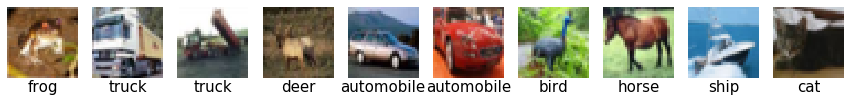

In [8]:
index_=range(0,10)
display_img_list(x_train[index_], y_train[index_])

# Achitecture

In [9]:
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

In [10]:
model = Sequential()
#add model layers
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=3, kernel_size=3,padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Conv2D(filters=32, kernel_size=3,padding='same', activation='relu'))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 3)         867       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 3)         12        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)               

In [13]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0005), metrics=['accuracy'])
model.fit(x_train
          , y_train
          , batch_size=10
          , epochs=10
          , shuffle=True)

Epoch 1/10
150/150 [==============================] - 1s 6ms/step - loss: 2.7511 - accuracy: 0.1267
Epoch 2/10
150/150 [==============================] - 0s 2ms/step - loss: 2.2391 - accuracy: 0.1933
Epoch 3/10
150/150 [==============================] - 0s 2ms/step - loss: 2.0077 - accuracy: 0.3133
Epoch 4/10
150/150 [==============================] - 0s 2ms/step - loss: 1.9114 - accuracy: 0.3133
Epoch 5/10
150/150 [==============================] - 1s 3ms/step - loss: 1.6329 - accuracy: 0.4600
Epoch 6/10
150/150 [==============================] - 0s 2ms/step - loss: 1.4472 - accuracy: 0.5867
Epoch 7/10
150/150 [==============================] - 0s 3ms/step - loss: 1.1929 - accuracy: 0.7200
Epoch 8/10
150/150 [==============================] - 0s 3ms/step - loss: 1.0708 - accuracy: 0.7867
Epoch 9/10
150/150 [==============================] - 0s 3ms/step - loss: 1.0642 - accuracy: 0.7733
Epoch 10/10
150/150 [==============================] - 0s 3ms/step - loss: 1.0747 - accuracy: 0.7933

# Auto-Encoder

In [14]:
AE = Autoencoder(
    input_dim = (28,28,1)
    , encoder_conv_filters = [32,64,64, 64]
    , encoder_conv_kernel_size = [3,3,3,3]
    , encoder_conv_strides = [1,2,2,1]
    , decoder_conv_t_filters = [64,64,32,1]
    , decoder_conv_t_kernel_size = [3,3,3,3]
    , decoder_conv_t_strides = [1,2,2,1]
    , z_dim = 2
)

NameError: name 'Autoencoder' is not defined

In [13]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [14]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [27]:
 autoencoder.layers[0]

In [15]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [16]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [17]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [24]:
x_train.shape

(60000, 784)

In [19]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [20]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.3588 - val_loss: 0.2712
Epoch 2/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.2638 - val_loss: 0.2524
Epoch 3/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.2420 - val_loss: 0.2294
Epoch 4/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.2219 - val_loss: 0.2121
Epoch 5/50
60000/60000 [==============================] - 1s 23us/step - loss: 0.2071 - val_loss: 0.1995
Epoch 6/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.1963 - val_loss: 0.1904
Epoch 7/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1883 - val_loss: 0.1833
Epoch 8/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.1817 - val_loss: 0.1773
Epoch 9/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.1761 - val_loss: 0.1720
Epoch

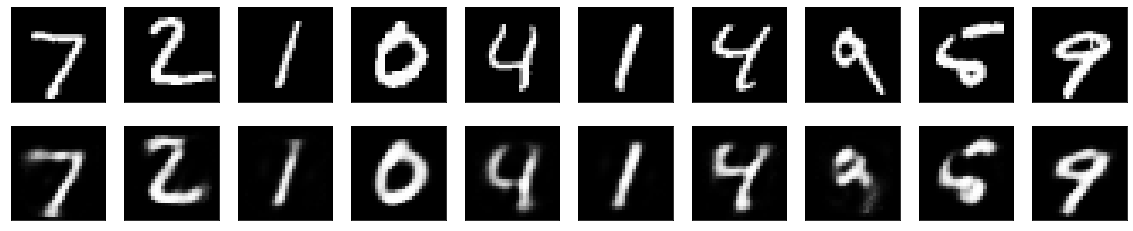

In [22]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()